In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("messy_data.csv")
df.head()

carat  clarity  color       cut  x dimension  y dimension  z dimension  \
0    0.5       IF      D     Ideal          5.1         5.15          3.2   
1    0.7     vvs2      E   premium          5.7                      3.52   
2    NaN      Si2      h      Good          4.3         4.31                
3    1.2       if      d     ideal                      6.82          4.2   
4    0.9       I1      J      Fair            6                       3.7   

   depth  table   price  
0   61.5           3000  
1     62     59    4500  
2   62.3     56     700  
3   61.7     58   10000  
4   61.7           2400

In [5]:
df.isna().sum()

carat           50
 clarity         0
 color           0
 cut             0
 x dimension     0
 y dimension     0
 z dimension     0
 depth           0
 table           0
 price           0
dtype: int64

In [6]:
df = df.replace(" ", np.nan)

In [7]:
df.isna().sum()

carat           50
 clarity         0
 color           0
 cut             0
 x dimension     3
 y dimension    64
 z dimension    48
 depth          67
 table          33
 price           4
dtype: int64

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         150 non-null    float64
 1    clarity      200 non-null    object 
 2    color        200 non-null    object 
 3    cut          200 non-null    object 
 4    x dimension  197 non-null    object 
 5    y dimension  136 non-null    object 
 6    z dimension  152 non-null    object 
 7    depth        133 non-null    object 
 8    table        167 non-null    object 
 9    price        196 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


In [9]:
df.isna().sum(axis=1).value_counts()

1    128
2     61
0      5
3      5
4      1
Name: count, dtype: int64

In [10]:
df_nan = df[df.isna().sum(axis=1) == 3]
df_nan

carat  clarity  color         cut  x dimension  y dimension  z dimension  \
44     NaN      si1      E        fair          6.0         6.01          NaN   
89     NaN      si2      E   very good          5.8         5.81          NaN   
95     NaN     vvs2      D        good          6.4         6.42         3.97   
107    NaN     vvs2      D        fair          6.4          NaN         3.97   
193    NaN     VVS2      E        Good          6.3          NaN         3.90   

     depth  table  price  
44     NaN     54   2700  
89     NaN     55   3000  
95     NaN    NaN   8000  
107   62.4    NaN   7900  
193    NaN     58   7700

In [11]:
mask = df.isna().sum(axis=1) == 3

df_nan_3 = df[~mask]
df_nan_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         150 non-null    float64
 1    clarity      195 non-null    object 
 2    color        195 non-null    object 
 3    cut          195 non-null    object 
 4    x dimension  192 non-null    object 
 5    y dimension  133 non-null    object 
 6    z dimension  149 non-null    object 
 7    depth        132 non-null    object 
 8    table        164 non-null    object 
 9    price        191 non-null    object 
dtypes: float64(1), object(9)
memory usage: 16.8+ KB


In [12]:
df_nan_3.isna().sum(axis=1).value_counts()

1    128
2     61
0      5
4      1
Name: count, dtype: int64

In [13]:
mask_2 = df_nan_3.isna().sum(axis=1) == 4

df_nan = df_nan_3[~mask_2]
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         150 non-null    float64
 1    clarity      194 non-null    object 
 2    color        194 non-null    object 
 3    cut          194 non-null    object 
 4    x dimension  191 non-null    object 
 5    y dimension  132 non-null    object 
 6    z dimension  149 non-null    object 
 7    depth        131 non-null    object 
 8    table        164 non-null    object 
 9    price        191 non-null    object 
dtypes: float64(1), object(9)
memory usage: 16.7+ KB


In [14]:
df_nan.isna().sum(axis=1).value_counts()

1    128
2     61
0      5
Name: count, dtype: int64

Usunięte zostały wierwsze zawierające 3 i 4 brakujące wartości, w pozostałych wierszach brakuje jednej lub dwóch wartości. Brakujące dane zostaną wypełnione metodami .fillna()

In [15]:
df_nan

carat  clarity  color         cut  x dimension  y dimension  z dimension  \
0     0.50       IF      D       Ideal          5.1         5.15          3.2   
1     0.70     vvs2      E     premium          5.7          NaN         3.52   
2      NaN      Si2      h        Good          4.3         4.31          NaN   
3     1.20       if      d       ideal          NaN         6.82          4.2   
4     0.90       I1      J        Fair            6          NaN          3.7   
..     ...      ...    ...         ...          ...          ...          ...   
195   0.45      si1      F   very good          4.9         4.89          NaN   
196   1.25     VVS2      H        Good          6.9          NaN         4.27   
197   0.55       i1      I     Premium          5.3          NaN         3.28   
198   0.85      Si2      E        fair          6.1         6.13         3.78   
199    NaN     VVS1      G   Very good          6.4         6.43         3.97   

     depth  table    price  
0     61.5    NaN     3000  
1       62     59     4500  
2     62.3     56      700  
3     61.7     58    10000  
4     61.7    NaN     2400  
..     ...    ...      ...  
195   62.4     59     2300  
196    NaN     55    10400  
197   62.3     57   150000  
198    NaN     58     6300  
199   62.5    NaN     7500  

[194 rows x 10 columns]

In [16]:
list(df_nan.columns)

['carat',
 ' clarity',
 ' color',
 ' cut',
 ' x dimension',
 ' y dimension',
 ' z dimension',
 ' depth',
 ' table',
 ' price']

In [17]:
df_nan.rename(columns = {' clarity':'clarity', ' color':'color', 
                              ' cut':'cut', ' x dimension': 'x_dimension', ' y dimension': 'y_dimension',
                        ' z dimension': 'z_dimension', ' depth':'depth', ' table':'table', ' price': 'price'}, inplace = True) 
   

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_37100/960874801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan.rename(columns = {' clarity':'clarity', ' color':'color',


In [18]:
list(df_nan.columns)

['carat',
 'clarity',
 'color',
 'cut',
 'x_dimension',
 'y_dimension',
 'z_dimension',
 'depth',
 'table',
 'price']

In [19]:
nan_in_col  = df_nan[df_nan['price'].isna()]
nan_in_col

carat clarity       color       cut x_dimension y_dimension z_dimension  \
10    0.5     Si1   Colorless   premium         NaN        5.21        3.21   
15    NaN    vvs2           I      Good         4.4        4.39        2.69   
17    1.0      IF           d     ideal         6.5        6.49         NaN   

    depth table price  
10   61.6    58   NaN  
15   61.3    57   NaN  
17   61.7    58   NaN

Ceny brakuje tylko w trzech wierszach, w związku z tym, że ceny mają szeroki zakres, będą one wypełnione średnią wartością dla odpowiedniej grupy 'cut'

In [20]:
df_nan['cut'].value_counts()

cut
 Premium      34
 Good         29
 Ideal        23
 fair         22
 good         19
 very good    18
 Fair         12
 Very good    10
 ideal         9
 Very Good     9
 premium       7
 very Good     2
Name: count, dtype: int64

In [21]:
df_nan['cut'] = df_nan['cut'].str.lower()

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_37100/3272520150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['cut'] = df_nan['cut'].str.lower()


In [22]:
df_nan['cut'].value_counts()

cut
 good         48
 premium      41
 very good    39
 fair         34
 ideal        32
Name: count, dtype: int64

In [23]:
df_nan['color'].value_counts()

color
 G            36
 I            32
 H            30
 F            24
 e            12
 D            11
 E            10
 d             9
 f             6
 j             6
 colorless     6
 h             4
 g             4
 J             2
 Colorless     2
Name: count, dtype: int64

In [24]:
df_nan['color'] = df_nan['color'].str.lower()

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_37100/1949728830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['color'] = df_nan['color'].str.lower()


In [25]:
df_nan['color'].value_counts()

color
 g            40
 h            34
 i            32
 f            30
 e            22
 d            20
 j             8
 colorless     8
Name: count, dtype: int64

In [26]:
df_nan['clarity'].value_counts()

clarity
 i1      26
 VVS1    23
 si2     22
 IF      20
 VVS2    18
 si1     17
 vvs2    16
 Si2     16
 Si1     12
 vvs1    11
 I1       5
 SI2      4
 if       3
 Vvs1     1
Name: count, dtype: int64

In [27]:
df_nan['clarity'] = df_nan['clarity'].str.lower()

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_37100/2914344193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['clarity'] = df_nan['clarity'].str.lower()


In [28]:
df_nan['clarity'].value_counts()

clarity
 si2     42
 vvs1    35
 vvs2    34
 i1      31
 si1     29
 if      23
Name: count, dtype: int64

In [29]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        150 non-null    float64
 1   clarity      194 non-null    object 
 2   color        194 non-null    object 
 3   cut          194 non-null    object 
 4   x_dimension  191 non-null    object 
 5   y_dimension  132 non-null    object 
 6   z_dimension  149 non-null    object 
 7   depth        131 non-null    object 
 8   table        164 non-null    object 
 9   price        191 non-null    object 
dtypes: float64(1), object(9)
memory usage: 16.7+ KB


In [30]:
df_nan.dtypes

carat          float64
clarity         object
color           object
cut             object
x_dimension     object
y_dimension     object
z_dimension     object
depth           object
table           object
price           object
dtype: object

In [29]:
df_nan[['x_dimension', 'y_dimension', 'z_dimension', 'depth',
       'table', 'price']] = df_nan[['x_dimension', 'y_dimension', 'z_dimension', 'depth',
       'table', 'price']].astype(object).astype(float)

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_30983/420645194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan[['x_dimension', 'y_dimension', 'z_dimension', 'depth',


In [30]:
df_nan.dtypes

carat          float64
clarity         object
color           object
cut             object
x_dimension    float64
y_dimension    float64
z_dimension    float64
depth          float64
table          float64
price          float64
dtype: object

In [31]:
df_nan['price'] = df_nan['price'].fillna(df_nan.groupby('cut')['price'].transform('mean'))

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_30983/1822301719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['price'] = df_nan['price'].fillna(df_nan.groupby('cut')['price'].transform('mean'))


In [32]:
df_nan.iloc[9:19]

carat clarity       color         cut  x_dimension  y_dimension  \
10   0.50     si1   colorless     premium          NaN         5.21   
11   0.40    vvs2           g   very good          4.9         4.88   
12    NaN     si2           j        fair          5.7         5.71   
13   1.10    vvs1           e     premium          6.6          NaN   
14   0.55     si2           h        good          5.3         5.29   
15    NaN    vvs2           i        good          4.4         4.39   
16   0.50     si1           g   very good          5.2          NaN   
17   1.00      if           d       ideal          6.5         6.49   
18   0.60     si2           h        good          5.5         5.52   
19   0.70      i1           j        fair          NaN         5.79   

    z_dimension  depth  table         price  
10         3.21   61.6   58.0  10012.500000  
11          NaN   61.2   56.0   1400.000000  
12         3.54    NaN   54.0   2000.000000  
13         4.08    NaN   57.0   9200.000000  
14          NaN   62.0    NaN   1800.000000  
15         2.69   61.3   57.0   4919.148936  
16         3.20    NaN   56.0   2300.000000  
17          NaN   61.7   58.0  11035.483871  
18          NaN    NaN   57.0   2200.000000  
19         3.57   61.6    NaN   2100.000000

In [33]:
df_nan['price'] = df_nan['price'].round(3)
df_nan.iloc[9:19]

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_30983/4194035535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['price'] = df_nan['price'].round(3)


carat clarity       color         cut  x_dimension  y_dimension  \
10   0.50     si1   colorless     premium          NaN         5.21   
11   0.40    vvs2           g   very good          4.9         4.88   
12    NaN     si2           j        fair          5.7         5.71   
13   1.10    vvs1           e     premium          6.6          NaN   
14   0.55     si2           h        good          5.3         5.29   
15    NaN    vvs2           i        good          4.4         4.39   
16   0.50     si1           g   very good          5.2          NaN   
17   1.00      if           d       ideal          6.5         6.49   
18   0.60     si2           h        good          5.5         5.52   
19   0.70      i1           j        fair          NaN         5.79   

    z_dimension  depth  table      price  
10         3.21   61.6   58.0  10012.500  
11          NaN   61.2   56.0   1400.000  
12         3.54    NaN   54.0   2000.000  
13         4.08    NaN   57.0   9200.000  
14          NaN   62.0    NaN   1800.000  
15         2.69   61.3   57.0   4919.149  
16         3.20    NaN   56.0   2300.000  
17          NaN   61.7   58.0  11035.484  
18          NaN    NaN   57.0   2200.000  
19         3.57   61.6    NaN   2100.000

In [34]:
df_nan.isna().sum(axis = 0)

carat          44
clarity         0
color           0
cut             0
x_dimension     3
y_dimension    62
z_dimension    45
depth          63
table          30
price           0
dtype: int64

In [35]:
df_nan['carat'].fillna(method = 'ffill', inplace=True)
df_nan

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_30983/2914541800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['carat'].fillna(method = 'ffill', inplace=True)


carat clarity color         cut  x_dimension  y_dimension  z_dimension  \
0     0.50      if     d       ideal          5.1         5.15         3.20   
1     0.70    vvs2     e     premium          5.7          NaN         3.52   
2     0.70     si2     h        good          4.3         4.31          NaN   
3     1.20      if     d       ideal          NaN         6.82         4.20   
4     0.90      i1     j        fair          6.0          NaN         3.70   
..     ...     ...   ...         ...          ...          ...          ...   
195   0.45     si1     f   very good          4.9         4.89          NaN   
196   1.25    vvs2     h        good          6.9          NaN         4.27   
197   0.55      i1     i     premium          5.3          NaN         3.28   
198   0.85     si2     e        fair          6.1         6.13         3.78   
199   0.85    vvs1     g   very good          6.4         6.43         3.97   

     depth  table     price  
0     61.5    NaN    3000.0  
1     62.0   59.0    4500.0  
2     62.3   56.0     700.0  
3     61.7   58.0   10000.0  
4     61.7    NaN    2400.0  
..     ...    ...       ...  
195   62.4   59.0    2300.0  
196    NaN   55.0   10400.0  
197   62.3   57.0  150000.0  
198    NaN   58.0    6300.0  
199   62.5    NaN    7500.0  

[194 rows x 10 columns]

In [36]:
df_nan.isna().sum(axis = 0)

carat           0
clarity         0
color           0
cut             0
x_dimension     3
y_dimension    62
z_dimension    45
depth          63
table          30
price           0
dtype: int64

In [37]:
df_nan['x_dimension'].fillna(method = 'ffill', inplace=True)


/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_30983/1548672721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['x_dimension'].fillna(method = 'ffill', inplace=True)


In [38]:
df_nan['y_dimension'].fillna(method = 'ffill', inplace=True)

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_30983/16357473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['y_dimension'].fillna(method = 'ffill', inplace=True)


In [39]:
df_nan['z_dimension'].fillna(method = 'ffill', inplace=True)

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_30983/1694648325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['z_dimension'].fillna(method = 'ffill', inplace=True)


In [40]:
df_nan['depth'].fillna(method = 'ffill', inplace=True)

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_30983/104344264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['depth'].fillna(method = 'ffill', inplace=True)


In [43]:
df_nan['table'].fillna(method = 'bfill', inplace=True)

/var/folders/26/r9tmk1h94832hykjp9vkd5mc0000gn/T/ipykernel_30983/2559477254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['table'].fillna(method = 'bfill', inplace=True)


In [44]:
df_nan.isna().sum(axis = 0)


carat          0
clarity        0
color          0
cut            0
x_dimension    0
y_dimension    0
z_dimension    0
depth          0
table          0
price          0
dtype: int64

In [45]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        194 non-null    float64
 1   clarity      194 non-null    object 
 2   color        194 non-null    object 
 3   cut          194 non-null    object 
 4   x_dimension  194 non-null    float64
 5   y_dimension  194 non-null    float64
 6   z_dimension  194 non-null    float64
 7   depth        194 non-null    float64
 8   table        194 non-null    float64
 9   price        194 non-null    float64
dtypes: float64(7), object(3)
memory usage: 16.7+ KB


In [48]:
df1 = df_nan.reset_index()
df1 = df1.drop(columns = 'index')
df1

carat clarity color         cut  x_dimension  y_dimension  z_dimension  \
0     0.50      if     d       ideal          5.1         5.15         3.20   
1     0.70    vvs2     e     premium          5.7         5.15         3.52   
2     0.70     si2     h        good          4.3         4.31         3.52   
3     1.20      if     d       ideal          4.3         6.82         4.20   
4     0.90      i1     j        fair          6.0         6.82         3.70   
..     ...     ...   ...         ...          ...          ...          ...   
189   0.45     si1     f   very good          4.9         4.89         3.96   
190   1.25    vvs2     h        good          6.9         4.89         4.27   
191   0.55      i1     i     premium          5.3         4.89         3.28   
192   0.85     si2     e        fair          6.1         6.13         3.78   
193   0.85    vvs1     g   very good          6.4         6.43         3.97   

     depth  table     price  
0     61.5   59.0    3000.0  
1     62.0   59.0    4500.0  
2     62.3   56.0     700.0  
3     61.7   58.0   10000.0  
4     61.7   58.0    2400.0  
..     ...    ...       ...  
189   62.4   59.0    2300.0  
190   62.4   55.0   10400.0  
191   62.3   57.0  150000.0  
192   62.3   58.0    6300.0  
193   62.5   58.0    7500.0  

[194 rows x 10 columns]

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

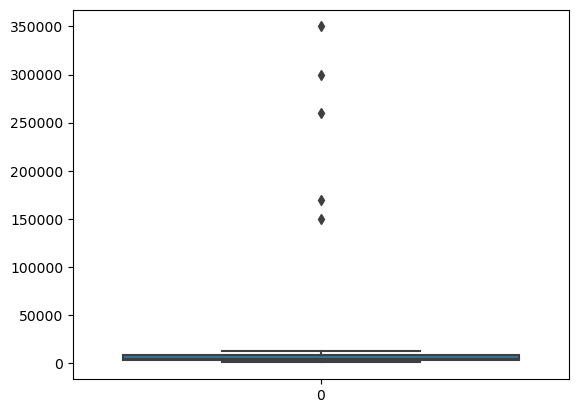

In [94]:
sns.boxplot(df1['price'])

In [95]:
mask = df1['price'] > 100000
df2 = df1[~mask]
df2

carat clarity color         cut  x_dimension  y_dimension  z_dimension  \
0     0.50      if     d       ideal          5.1         5.15         3.20   
1     0.70    vvs2     e     premium          5.7         5.15         3.52   
2     0.70     si2     h        good          4.3         4.31         3.52   
3     1.20      if     d       ideal          4.3         6.82         4.20   
4     0.90      i1     j        fair          6.0         6.82         3.70   
..     ...     ...   ...         ...          ...          ...          ...   
188   0.95     si1     g       ideal          6.4         6.42         3.96   
189   0.45     si1     f   very good          4.9         4.89         3.96   
190   1.25    vvs2     h        good          6.9         4.89         4.27   
192   0.85     si2     e        fair          6.1         6.13         3.78   
193   0.85    vvs1     g   very good          6.4         6.43         3.97   

     depth  table    price  
0     61.5   59.0   3000.0  
1     62.0   59.0   4500.0  
2     62.3   56.0    700.0  
3     61.7   58.0  10000.0  
4     61.7   58.0   2400.0  
..     ...    ...      ...  
188   62.1   56.0   7100.0  
189   62.4   59.0   2300.0  
190   62.4   55.0  10400.0  
192   62.3   58.0   6300.0  
193   62.5   58.0   7500.0  

[189 rows x 10 columns]

<Axes: >

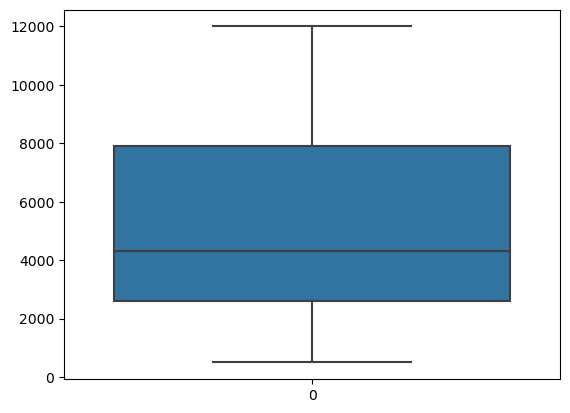

In [96]:
sns.boxplot(df2['price'])

/Users/michal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


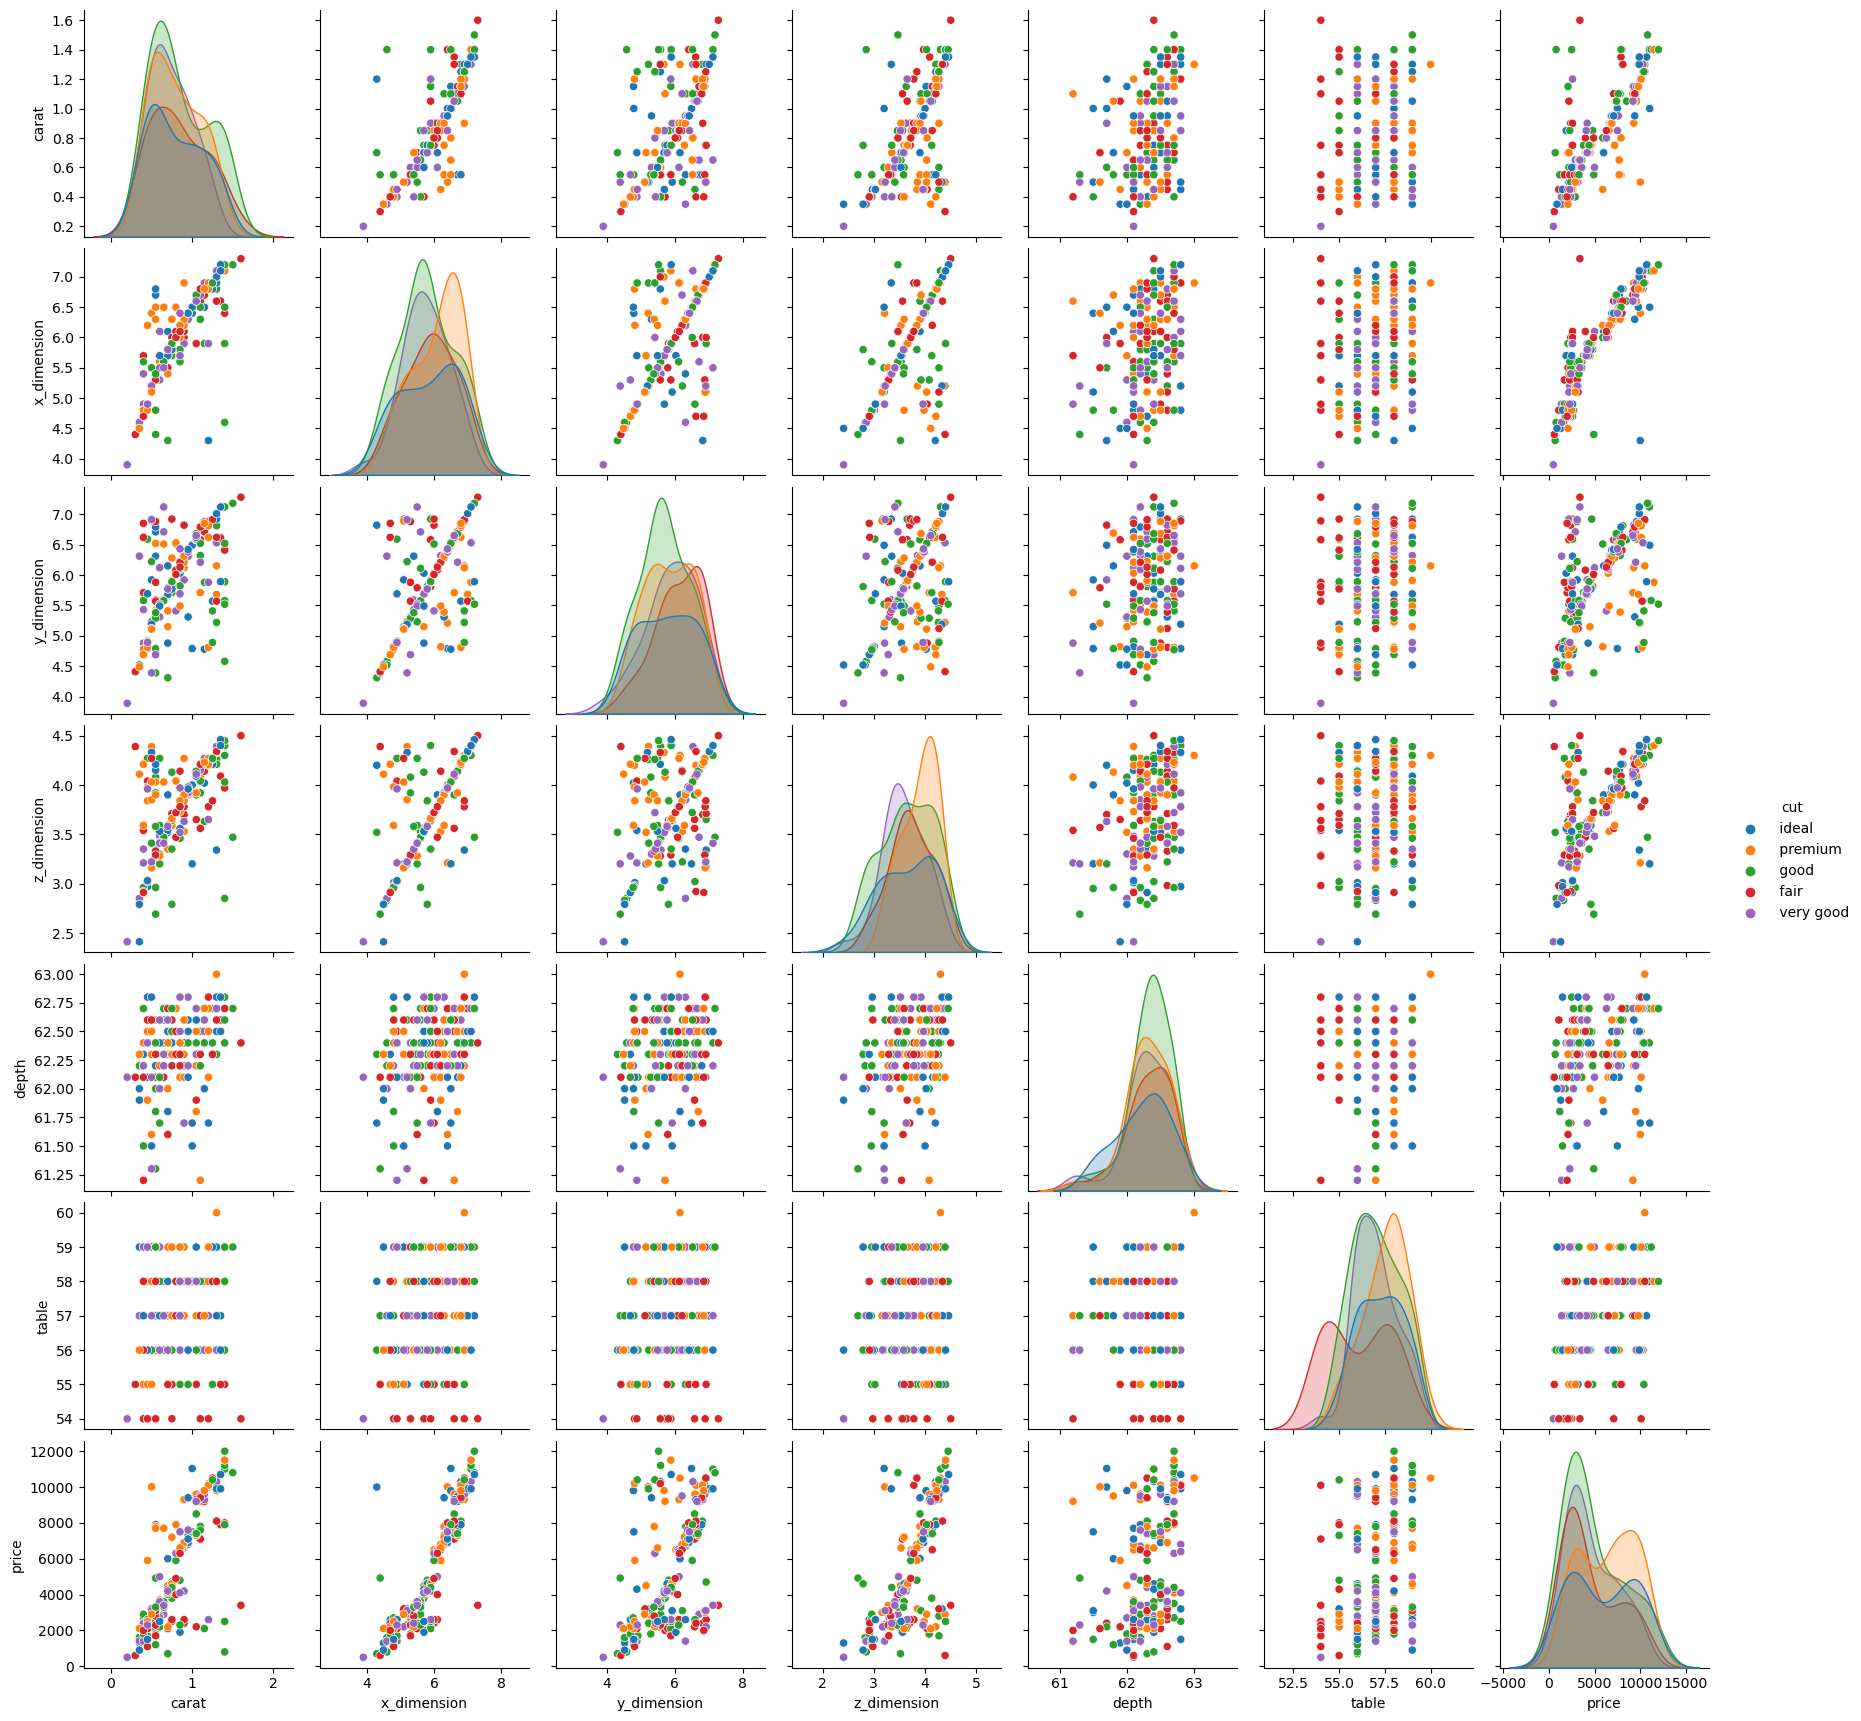

In [97]:
sns.pairplot(data=df2, hue = 'cut')

In [98]:
df2.to_csv("tidy_data2.csv")

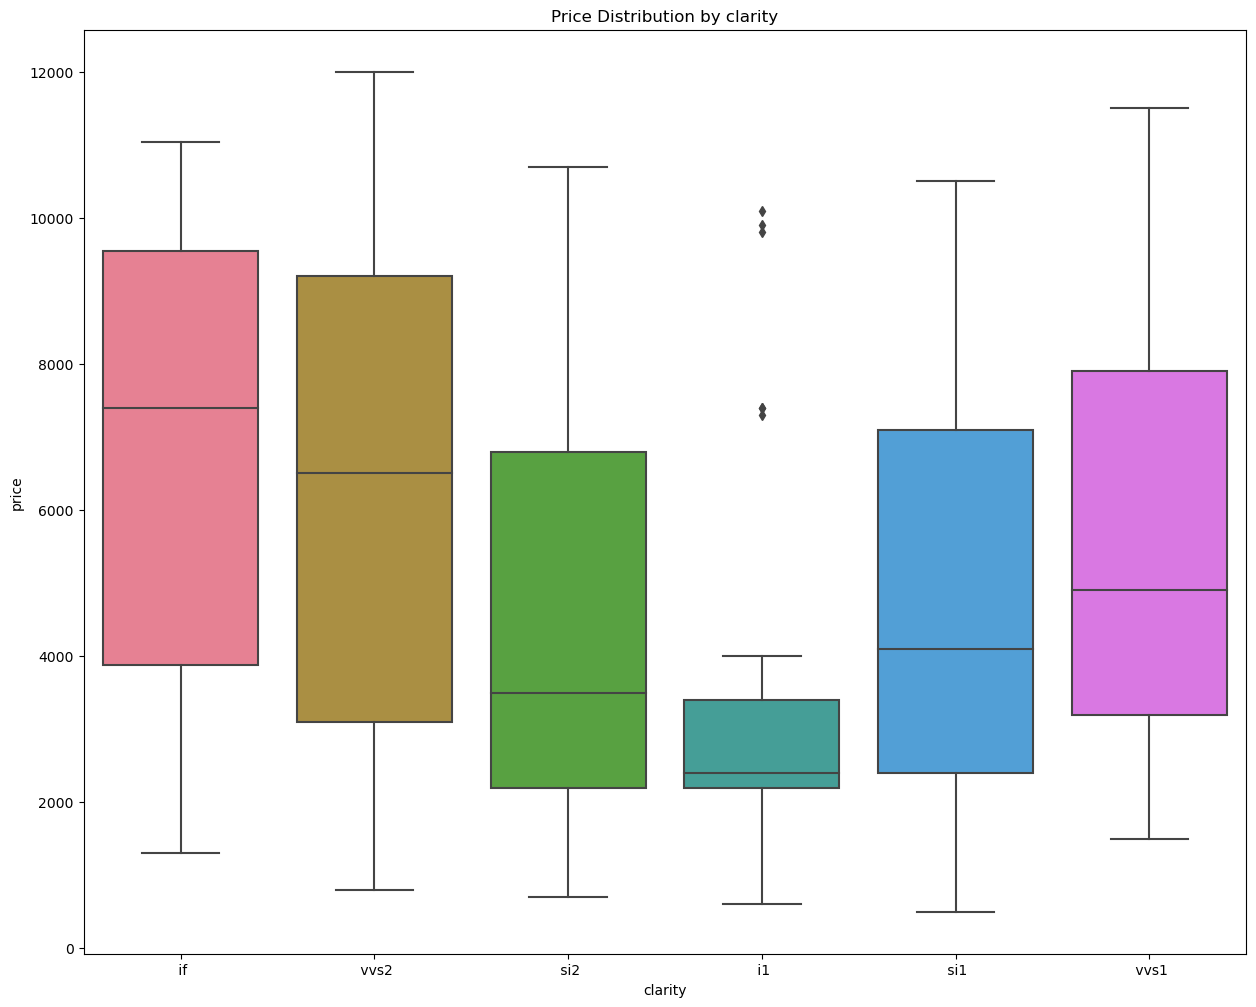

In [99]:
plt.figure(figsize=(15, 12))
plt.title(f'Price Distribution by clarity')
sns.boxplot(x='clarity', y='price',data=df2, palette = "husl")
plt.show()

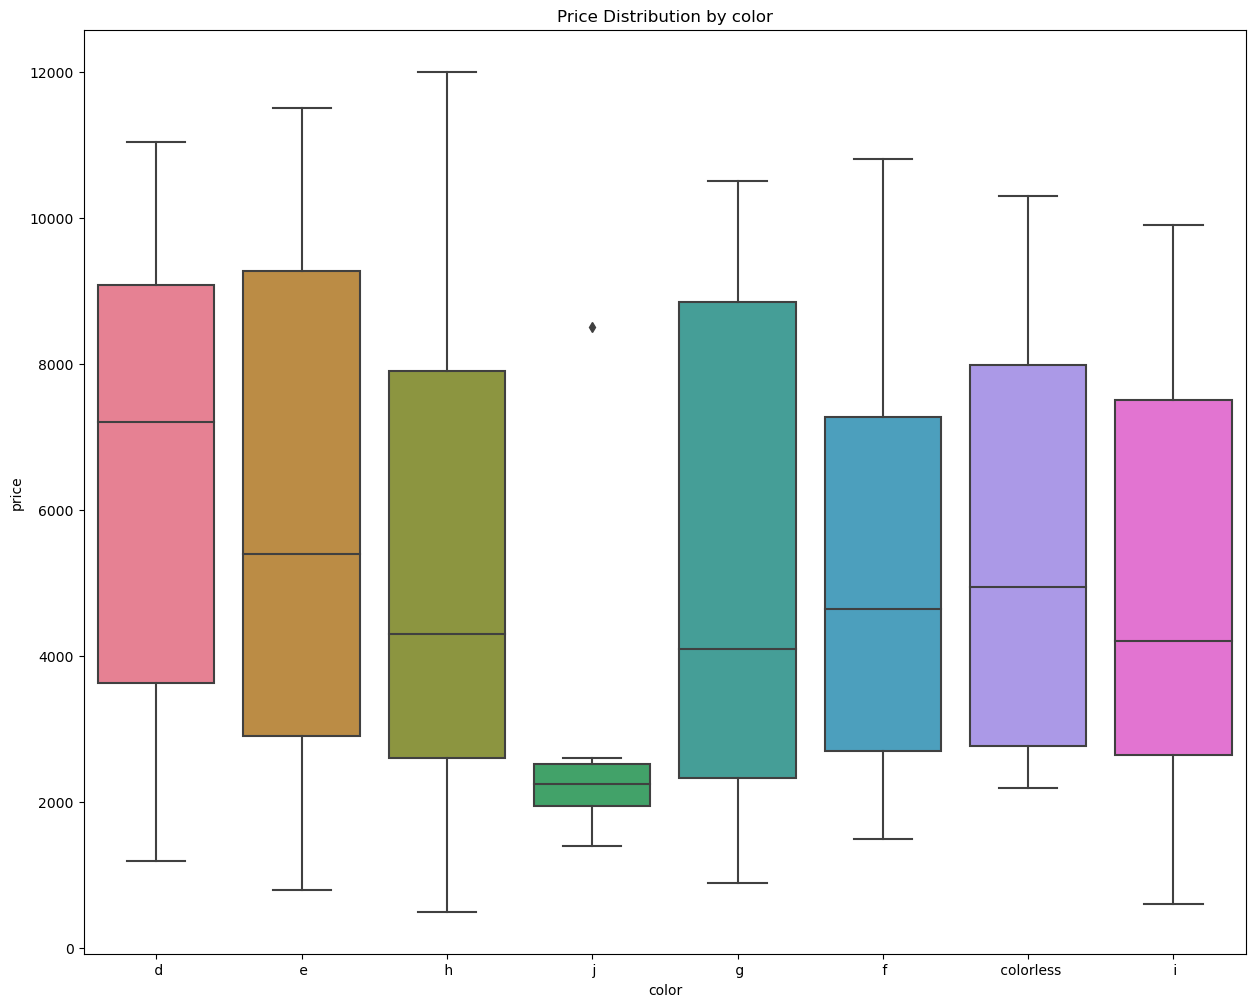

In [100]:
plt.figure(figsize=(15, 12))
plt.title(f'Price Distribution by color')
sns.boxplot(x='color', y='price',data=df2, palette = "husl")
plt.show()

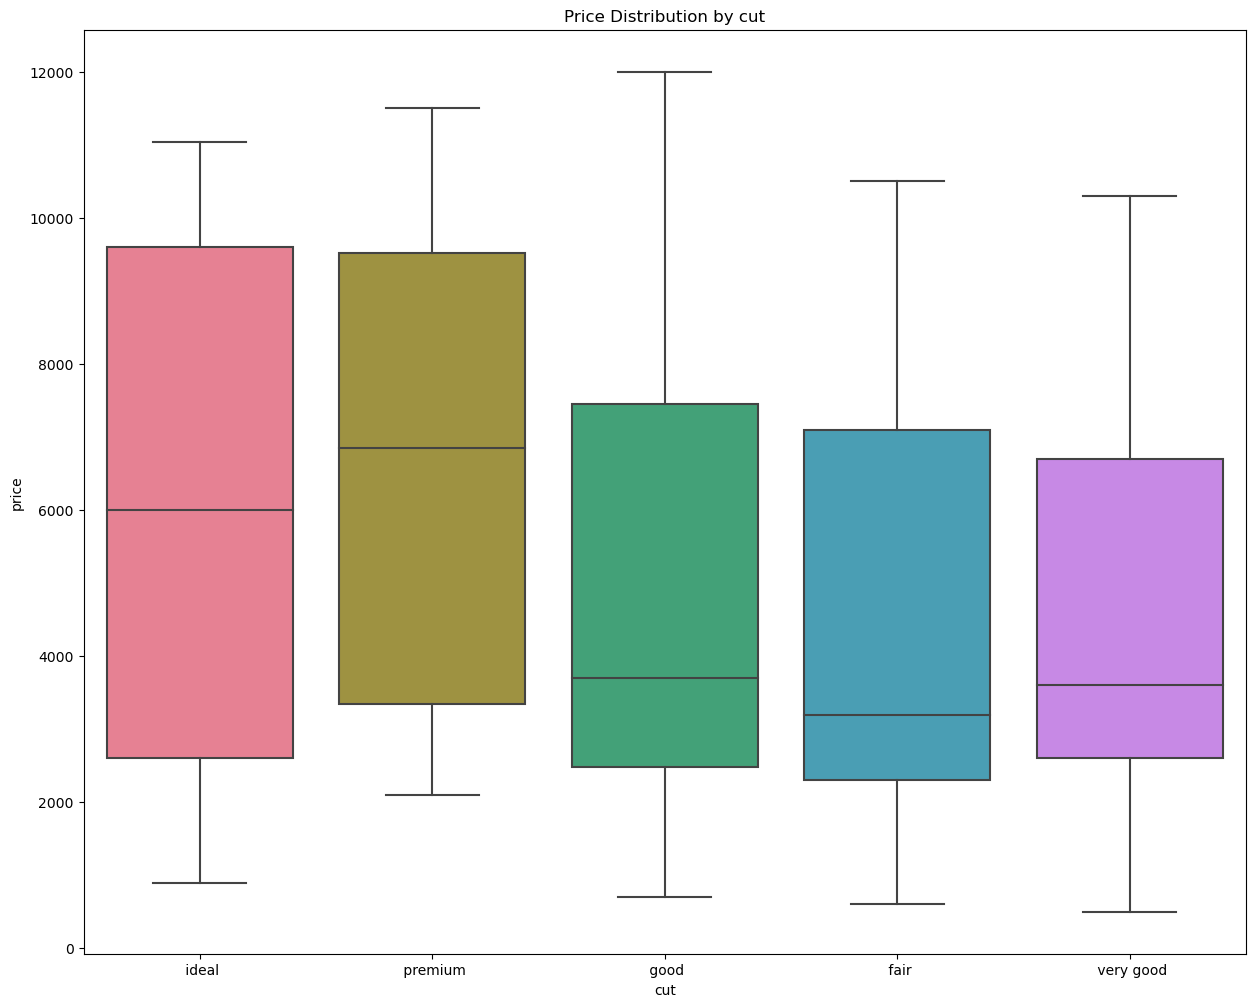

In [101]:
plt.figure(figsize=(15, 12))
plt.title(f'Price Distribution by cut')
sns.boxplot(x='cut', y='price',data=df2, palette = "husl")
plt.show()

In [105]:
df2

Unnamed: 0  carat clarity color         cut  x_dimension  y_dimension  \
0             0   0.50      if     d       ideal          5.1         5.15   
1             1   0.70    vvs2     e     premium          5.7         5.15   
2             2   0.70     si2     h        good          4.3         4.31   
3             3   1.20      if     d       ideal          4.3         6.82   
4             4   0.90      i1     j        fair          6.0         6.82   
..          ...    ...     ...   ...         ...          ...          ...   
184         188   0.95     si1     g       ideal          6.4         6.42   
185         189   0.45     si1     f   very good          4.9         4.89   
186         190   1.25    vvs2     h        good          6.9         4.89   
187         192   0.85     si2     e        fair          6.1         6.13   
188         193   0.85    vvs1     g   very good          6.4         6.43   

     z_dimension  depth  table    price  
0           3.20   61.5   59.0   3000.0  
1           3.52   62.0   59.0   4500.0  
2           3.52   62.3   56.0    700.0  
3           4.20   61.7   58.0  10000.0  
4           3.70   61.7   58.0   2400.0  
..           ...    ...    ...      ...  
184         3.96   62.1   56.0   7100.0  
185         3.96   62.4   59.0   2300.0  
186         4.27   62.4   55.0  10400.0  
187         3.78   62.3   58.0   6300.0  
188         3.97   62.5   58.0   7500.0  

[189 rows x 11 columns]

In [109]:
df2.to_csv("df2.csv")

In [110]:
df2['cut'].value_counts()

cut
 good         48
 premium      40
 very good    37
 fair         33
 ideal        31
Name: count, dtype: int64

In [116]:
df2['cut'] = df2['cut'].str.strip()
df2['cut'].value_counts()

cut
good         48
premium      40
very good    37
fair         33
ideal        31
Name: count, dtype: int64

In [117]:
from sklearn.preprocessing import OrdinalEncoder

categories_order = [['fair', 'good', 'very good', 'premium', 'ideal']]

# Create the encoder with the correct order
encoder = OrdinalEncoder(categories=categories_order)

# Re-encode the 'cut' column with the correct order
df2['cut_encoded'] = encoder.fit_transform(df2[['cut']])

# Display the first few rows to verify the correct encoding
df2[['cut', 'cut_encoded']].head()

cut  cut_encoded
0    ideal          4.0
1  premium          3.0
2     good          1.0
3    ideal          4.0
4     fair          0.0

In [118]:
df2

Unnamed: 0  carat clarity color        cut  x_dimension  y_dimension  \
0             0   0.50      if     d      ideal          5.1         5.15   
1             1   0.70    vvs2     e    premium          5.7         5.15   
2             2   0.70     si2     h       good          4.3         4.31   
3             3   1.20      if     d      ideal          4.3         6.82   
4             4   0.90      i1     j       fair          6.0         6.82   
..          ...    ...     ...   ...        ...          ...          ...   
184         188   0.95     si1     g      ideal          6.4         6.42   
185         189   0.45     si1     f  very good          4.9         4.89   
186         190   1.25    vvs2     h       good          6.9         4.89   
187         192   0.85     si2     e       fair          6.1         6.13   
188         193   0.85    vvs1     g  very good          6.4         6.43   

     z_dimension  depth  table    price  cut_encoded  
0           3.20   61.5   59.0   3000.0          4.0  
1           3.52   62.0   59.0   4500.0          3.0  
2           3.52   62.3   56.0    700.0          1.0  
3           4.20   61.7   58.0  10000.0          4.0  
4           3.70   61.7   58.0   2400.0          0.0  
..           ...    ...    ...      ...          ...  
184         3.96   62.1   56.0   7100.0          4.0  
185         3.96   62.4   59.0   2300.0          2.0  
186         4.27   62.4   55.0  10400.0          1.0  
187         3.78   62.3   58.0   6300.0          0.0  
188         3.97   62.5   58.0   7500.0          2.0  

[189 rows x 12 columns]

In [121]:
df2['clarity'] = df2['clarity'].str.strip()
df2['clarity'].value_counts()

clarity
si2     41
vvs1    35
vvs2    33
i1      29
si1     29
if      22
Name: count, dtype: int64

In [123]:
clarity_categories_order = [['i1','si1', 'si2', 'vvs2', 'vvs1', 'if']]

# Create the encoder with the correct order
encoder = OrdinalEncoder(categories=clarity_categories_order)

# Re-encode the 'cut' column with the correct order
df2['clarity_encoded'] = encoder.fit_transform(df2[['clarity']])

# Display the first few rows to verify the correct encoding
df2[['clarity', 'clarity_encoded']].head()

clarity  clarity_encoded
0      if              5.0
1    vvs2              3.0
2     si2              2.0
3      if              5.0
4      i1              0.0

In [126]:
df2['color'] = df2['color'].str.strip()
df2['color'].value_counts()

color
g            38
h            34
i            31
f            30
e            22
d            18
j             8
colorless     8
Name: count, dtype: int64

In [127]:
color_categories_order = [['j','i', 'h', 'g', 'f', 'e', 'd', 'colorless']]

encoder = OrdinalEncoder(categories=color_categories_order)

df2['color_encoded'] = encoder.fit_transform(df2[['color']])

df2[['color', 'color_encoded']].head()

color  color_encoded
0     d            6.0
1     e            5.0
2     h            2.0
3     d            6.0
4     j            0.0

In [129]:
df2
df2.to_csv("df2_encoded.csv")

In [130]:
df3 = df2.drop(columns = ['Unnamed: 0', 'clarity', 'cut', 'color'])
df3

carat  x_dimension  y_dimension  z_dimension  depth  table    price  \
0     0.50          5.1         5.15         3.20   61.5   59.0   3000.0   
1     0.70          5.7         5.15         3.52   62.0   59.0   4500.0   
2     0.70          4.3         4.31         3.52   62.3   56.0    700.0   
3     1.20          4.3         6.82         4.20   61.7   58.0  10000.0   
4     0.90          6.0         6.82         3.70   61.7   58.0   2400.0   
..     ...          ...          ...          ...    ...    ...      ...   
184   0.95          6.4         6.42         3.96   62.1   56.0   7100.0   
185   0.45          4.9         4.89         3.96   62.4   59.0   2300.0   
186   1.25          6.9         4.89         4.27   62.4   55.0  10400.0   
187   0.85          6.1         6.13         3.78   62.3   58.0   6300.0   
188   0.85          6.4         6.43         3.97   62.5   58.0   7500.0   

     cut_encoded  clarity_encoded  color_encoded  
0            4.0              5.0            6.0  
1            3.0              3.0            5.0  
2            1.0              2.0            2.0  
3            4.0              5.0            6.0  
4            0.0              0.0            0.0  
..           ...              ...            ...  
184          4.0              1.0            3.0  
185          2.0              1.0            4.0  
186          1.0              3.0            2.0  
187          0.0              2.0            5.0  
188          2.0              4.0            3.0  

[189 rows x 10 columns]

In [131]:
df3.to_csv("df3.csv")

In [31]:
df3 = pd.read_csv('df3.csv')

<Axes: xlabel='price', ylabel='Count'>

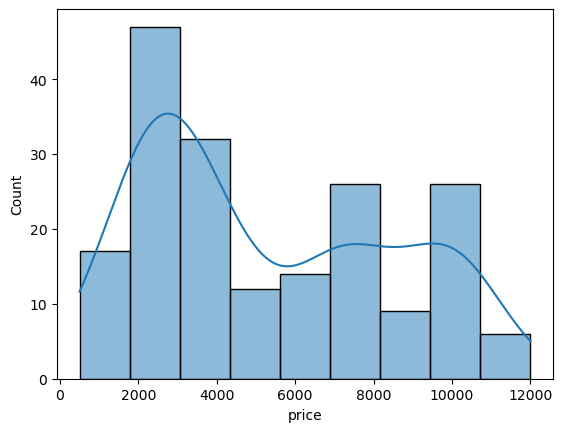

In [34]:
sns.histplot(data = df3, x = 'price', kde = True)

In [35]:
column_names = list(df3.columns)
column_names

['Unnamed: 0',
 'carat',
 'x_dimension',
 'y_dimension',
 'z_dimension',
 'depth',
 'table',
 'price',
 'cut_encoded',
 'clarity_encoded',
 'color_encoded']

In [36]:
import statsmodels.formula.api as smf

model = smf.ols(formula="price ~ carat + x_dimension + y_dimension + z_dimension + depth + table + cut_encoded + clarity_encoded + color_encoded", data=df3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     110.4
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           3.10e-68
Time:                        14:03:26   Log-Likelihood:                -1612.9
No. Observations:                 189   AIC:                             3246.
Df Residuals:                     179   BIC:                             3278.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.131e+04   1.86e+04     

/Users/michal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


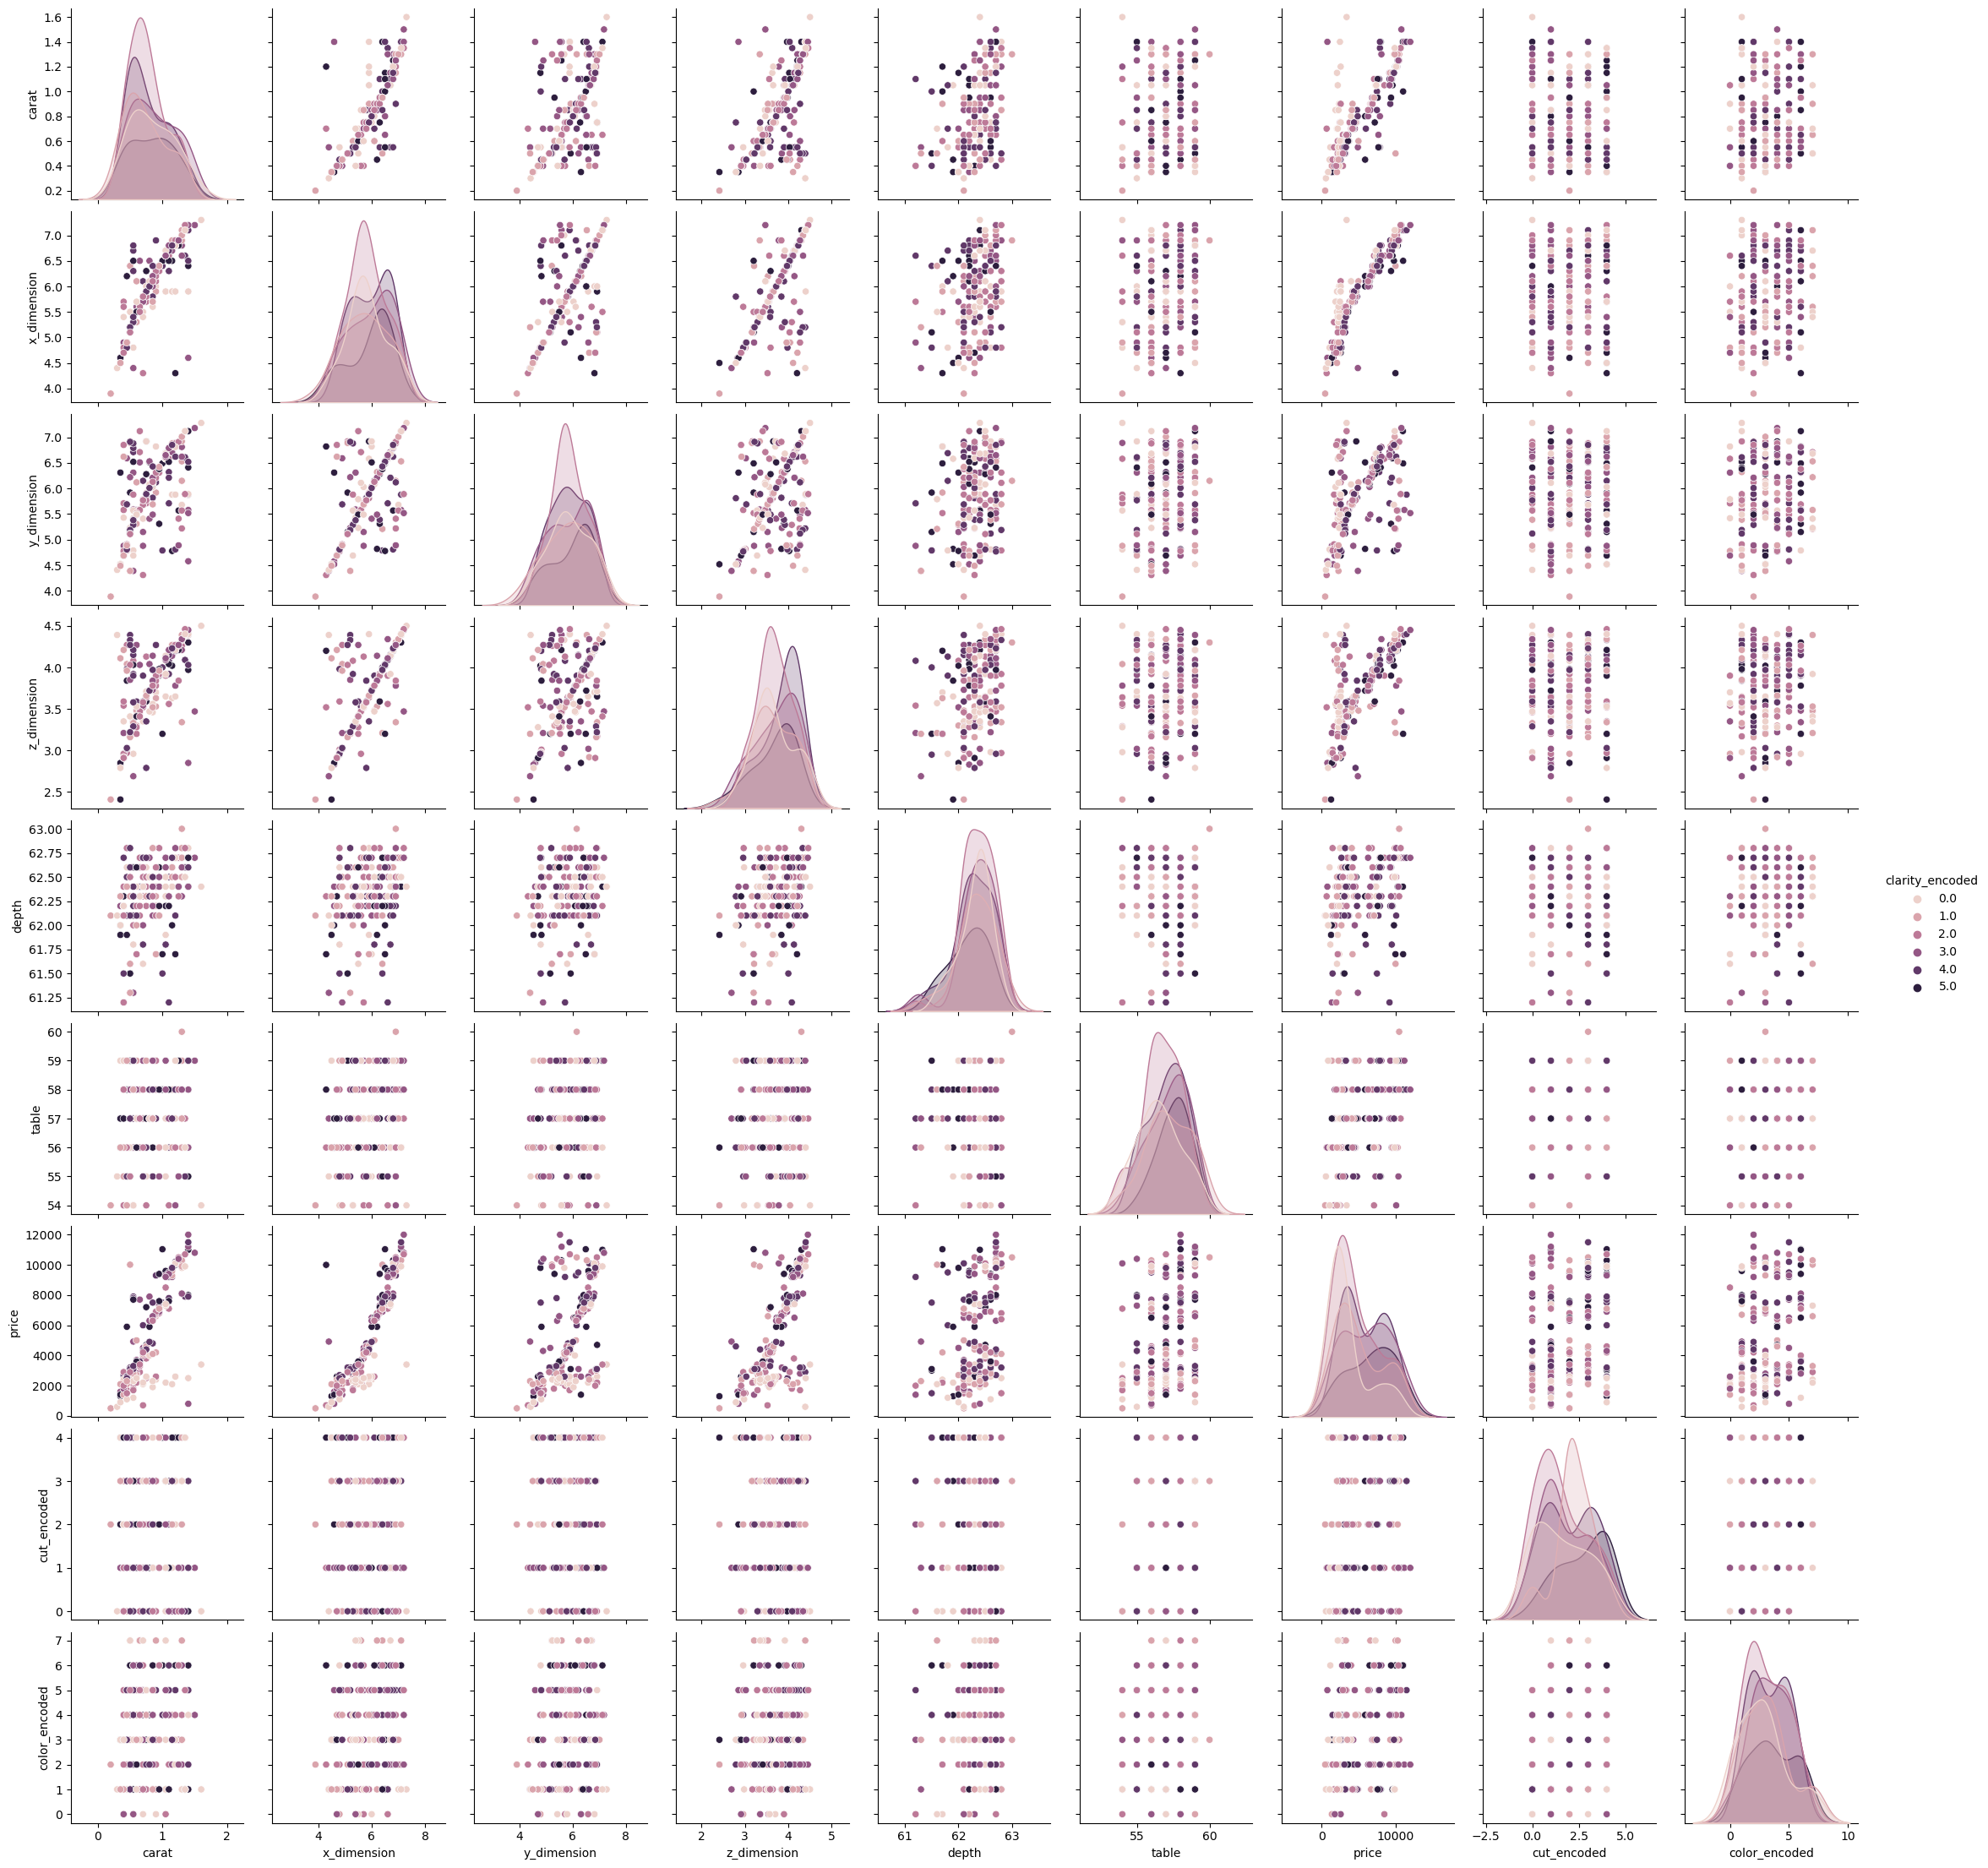

In [136]:
sns.pairplot(data=df3, hue = 'clarity_encoded')

<Axes: >

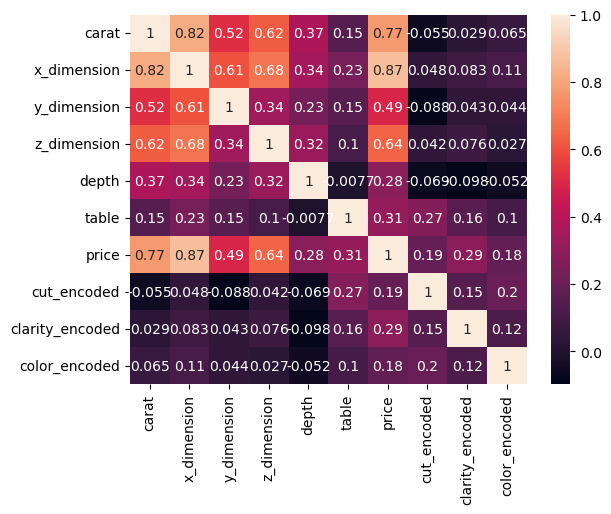

In [140]:
sns.heatmap(df3.corr(), annot= True)

<Axes: xlabel='carat', ylabel='price'>

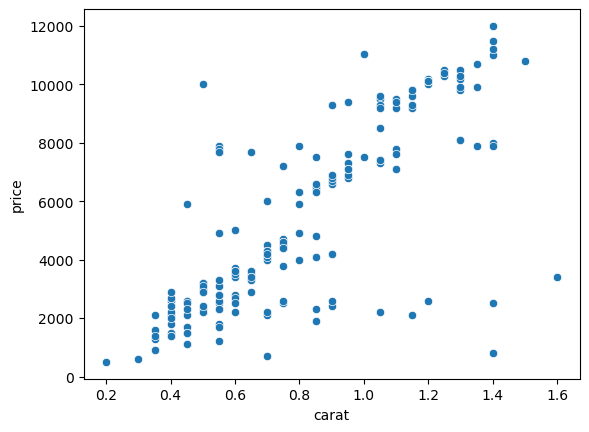

In [144]:
sns.scatterplot(data = df3, x = 'carat', y='price')

<Axes: xlabel='x_dimension', ylabel='price'>

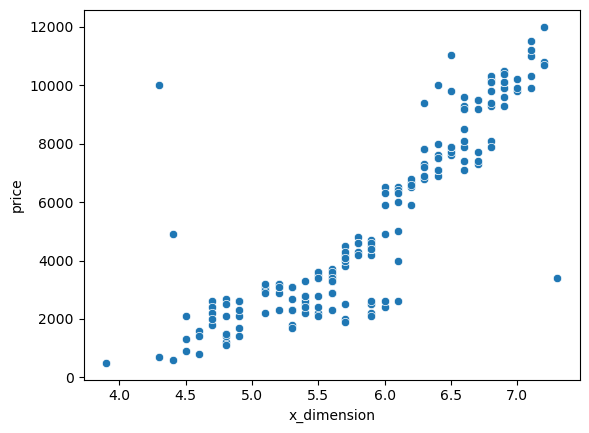

In [145]:
sns.scatterplot(data = df3, x = 'x_dimension', y='price')

<Axes: xlabel='cut_encoded', ylabel='price'>

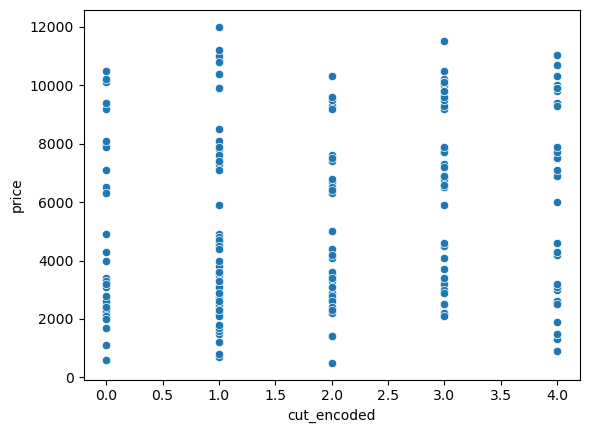

In [146]:
sns.scatterplot(data = df3, x = 'cut_encoded', y='price')

<Axes: xlabel='table', ylabel='price'>

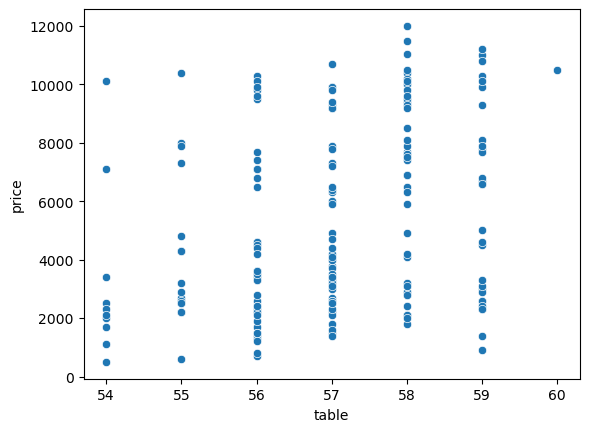

In [147]:
sns.scatterplot(data = df3, x = 'table', y='price')

In [149]:
model2 = smf.ols(formula="price ~ carat + x_dimension + y_dimension + table + clarity_encoded + cut_encoded", data=df3).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     164.0
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.21e-70
Time:                        14:17:57   Log-Likelihood:                -1615.0
No. Observations:                 189   AIC:                             3244.
Df Residuals:                     182   BIC:                             3267.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.107e+04   3929.433     

In [150]:
model3 = smf.ols(formula="price ~ carat + x_dimension + table + clarity_encoded + cut_encoded", data=df3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.48e-71
Time:                        14:18:24   Log-Likelihood:                -1615.7
No. Observations:                 189   AIC:                             3243.
Df Residuals:                     183   BIC:                             3263.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.128e+04   3926.799     

In [152]:
model4 = smf.ols(formula="price ~ carat + x_dimension + clarity_encoded + cut_encoded", data=df3).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     240.7
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           6.05e-72
Time:                        14:19:31   Log-Likelihood:                -1617.6
No. Observations:                 189   AIC:                             3245.
Df Residuals:                     184   BIC:                             3261.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.377e+04    931.864    -

In [37]:
model5 = smf.ols(formula="price ~ carat", data=df3).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     276.7
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.00e-38
Time:                        14:03:49   Log-Likelihood:                -1704.7
No. Observations:                 189   AIC:                             3413.
Df Residuals:                     187   BIC:                             3420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -807.4529    395.654     -2.041      0.0

In [38]:
import plotly.graph_objects as go

df3["carat_fitted"] = model5.fittedvalues

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df3['carat'], y=df3['price'], name="Carat vs Price", mode="markers"))
fig.add_trace(go.Scatter(
    x=df3["carat"], y=df3["carat_fitted"], name="Model regresji"))
fig.update_layout(title="Linia regresji carat vs price", xaxis_title="carat",
    yaxis_title="price")
fig.show()

In [39]:
model6 = smf.ols(formula="price ~ x_dimension", data=df3).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     589.6
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.02e-59
Time:                        14:03:53   Log-Likelihood:                -1656.0
No. Observations:                 189   AIC:                             3316.
Df Residuals:                     187   BIC:                             3322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -1.56e+04    868.281    -17.962      

In [40]:
import plotly.graph_objects as go

df3["x_dimension_fitted"] = model6.fittedvalues

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df3['x_dimension'], y=df3['price'], name="x_dimension vs price", mode="markers"))
fig.add_trace(go.Scatter(
    x=df3["x_dimension"], y=df3["x_dimension_fitted"], name="Model regresji"))
fig.update_layout(title="Linia regresji x_dimension vs price", xaxis_title="x_dimension",
    yaxis_title="price")
fig.show()

In [161]:
model7 = smf.ols(formula="price ~ clarity_encoded", data=df3).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     3.996
Date:                Wed, 31 Jan 2024   Prob (F-statistic):            0.00183
Time:                        14:41:02   Log-Likelihood:                -1780.8
No. Observations:                 189   AIC:                             3574.
Df Residuals:                     183   BIC:                             3593.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Axes: xlabel='clarity_encoded', ylabel='price'>

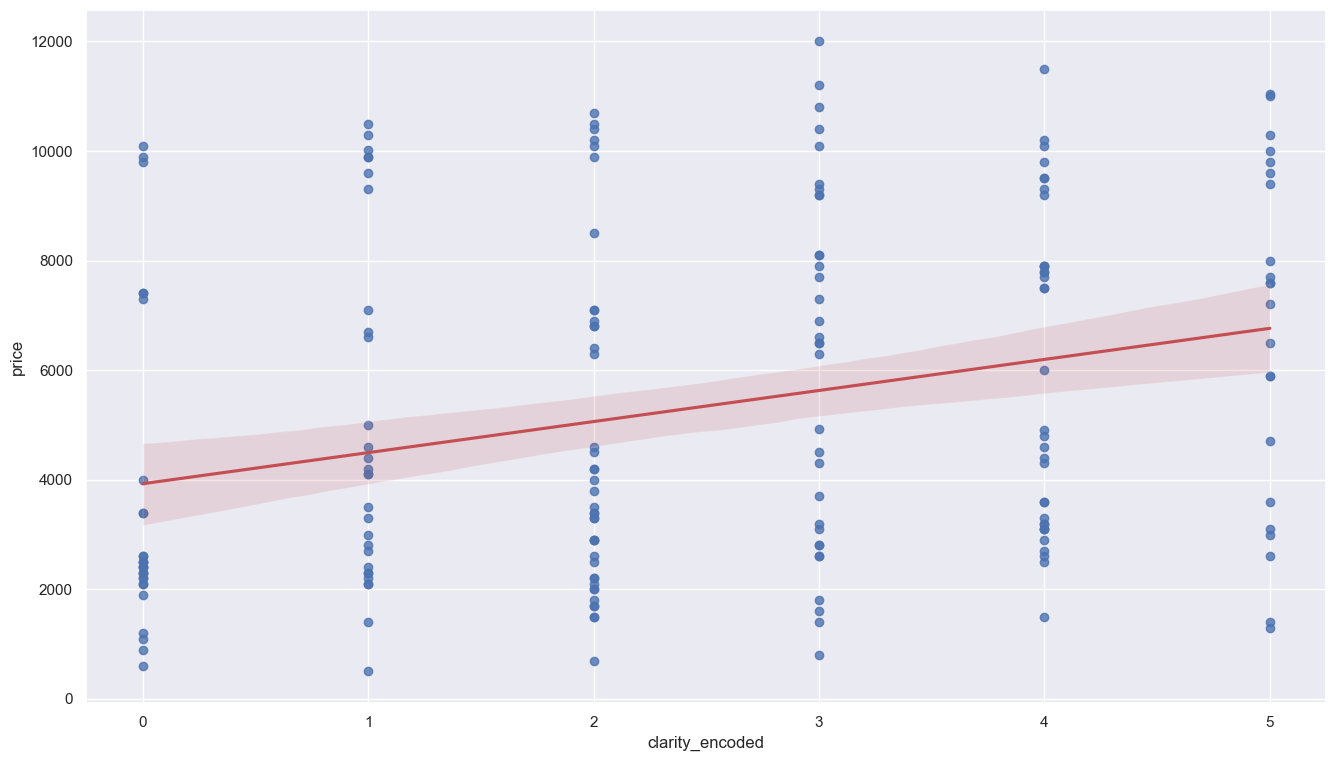

In [176]:
sns.set(rc = {'figure.figsize':(16,9)})
sns.regplot(x="clarity_encoded", y="price", data=df3, line_kws=dict(color="r"))

In [163]:
model7 = smf.ols(formula="price ~ C(cut_encoded)", data=df3).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.861
Date:                Wed, 31 Jan 2024   Prob (F-statistic):             0.0248
Time:                        14:44:01   Log-Likelihood:                -1784.9
No. Observations:                 189   AIC:                             3580.
Df Residuals:                     184   BIC:                             3596.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4572.72

<Axes: xlabel='cut_encoded', ylabel='price'>

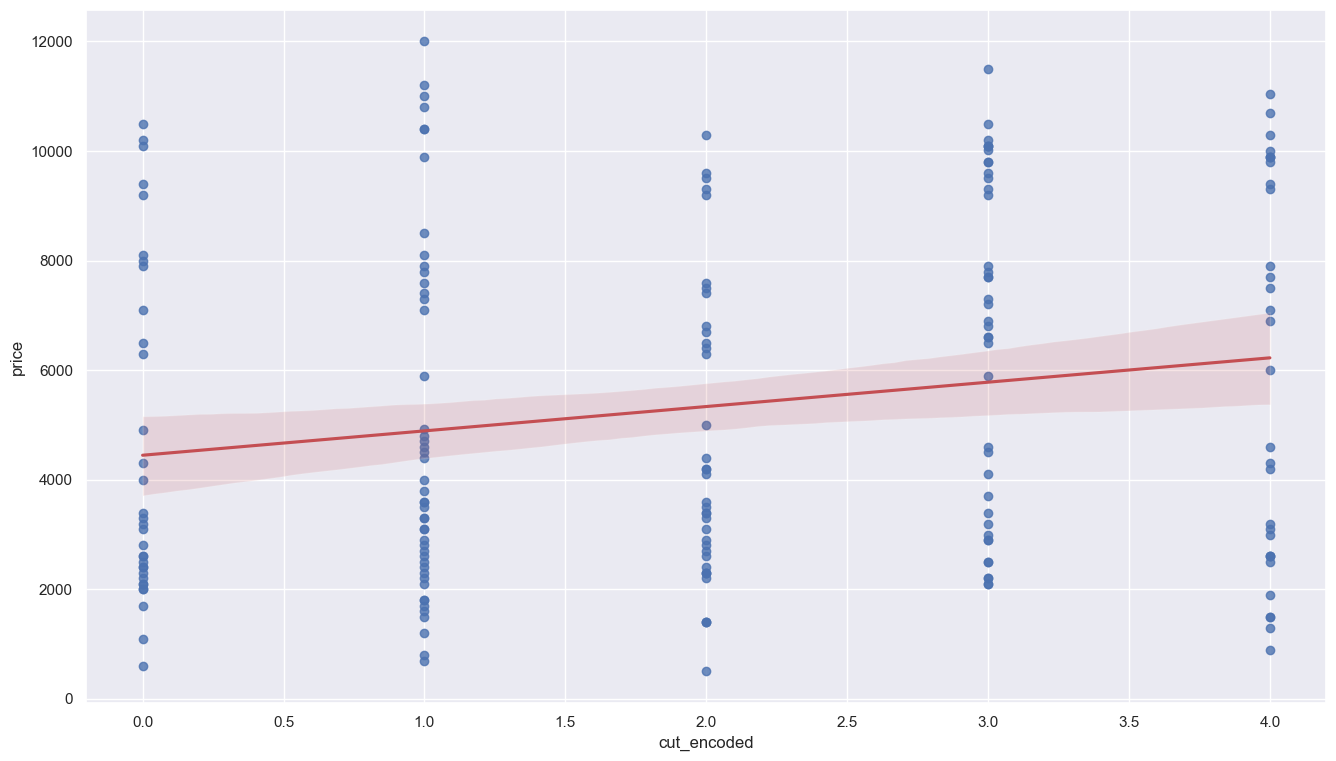

In [179]:
sns.regplot(x="cut_encoded", y="price", data=df3, line_kws=dict(color="r"))

In [183]:

df2.to_csv("df2.csv")
               
